In [103]:
from tifffile import imread, imsave
import matplotlib.pyplot as plt
from torch.nn import MaxPool2d, Conv2d
import torch
import numpy as np
from glob import glob

In [140]:
files = glob('/group/jug/Sheida/maester_data/download/high_c1/nucleus/*.tif')

In [112]:
downsample = MaxPool2d(kernel_size=3, padding=1, stride=2)

In [145]:
for i in files:
    img = imread(i).astype(np.float32)
    img = np.pad(img, ((2,3),(4,4)), 'constant', constant_values=0)
    input = torch.from_numpy(img).unsqueeze(0).unsqueeze(0).float()
    output = downsample(downsample(downsample(downsample(downsample(input)))))
    downsampled_img = output.squeeze().numpy()
    imsave(i[0:i.rfind('/')]+'/five_level'+i[i.rfind('/'):], downsampled_img)

/tmp/ipykernel_43804/3689466398.py:7: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave(i[0:i.rfind('/')]+'/five_level'+i[i.rfind('/'):], downsampled_img)


# Sanity Check

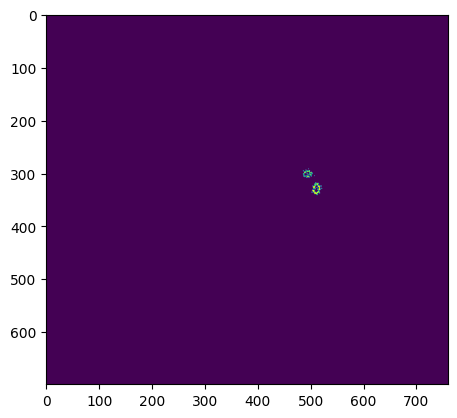

In [10]:
plt.imshow(imgs[0])

In [15]:
m = MaxPool2d(kernel_size=3, padding=1, stride=2)
input = torch.from_numpy(imgs[0]).unsqueeze(0).unsqueeze(0).float()
output = m(input)
output.shape

torch.Size([1, 1, 350, 380])

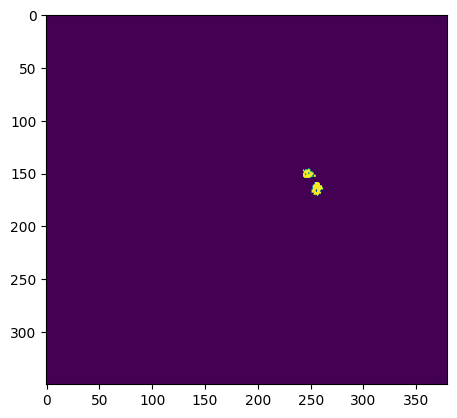

In [16]:
plt.imshow(output.squeeze().numpy())

In [30]:
m(output).shape

torch.Size([1, 1, 175, 190])

In [34]:
a = np.arange(6).reshape(2,3)
np.pad(a, ((1,1),(1,1)), 'constant', constant_values=0)

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0],
       [0, 3, 4, 5, 0],
       [0, 0, 0, 0, 0]])

(699, 760)
(704, 768)


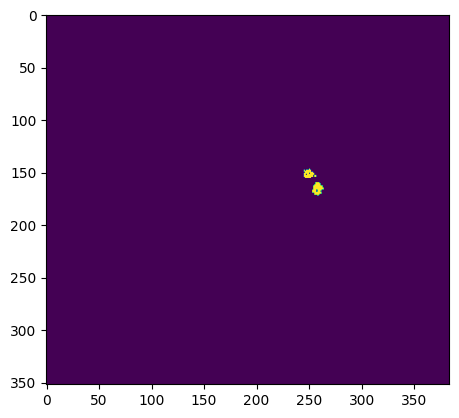

In [57]:
b = imgs[0]
print(b.shape)
b = np.pad(b, ((2,3),(4,4)), 'constant', constant_values=0)
print(b.shape)
out3 = m(torch.from_numpy(b).unsqueeze(0).unsqueeze(0).float())
out3.shape
plt.imshow(out3.squeeze().numpy())

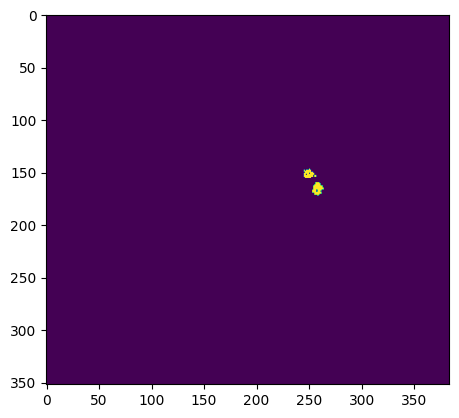

In [58]:
plt.imshow(out3.squeeze().numpy())

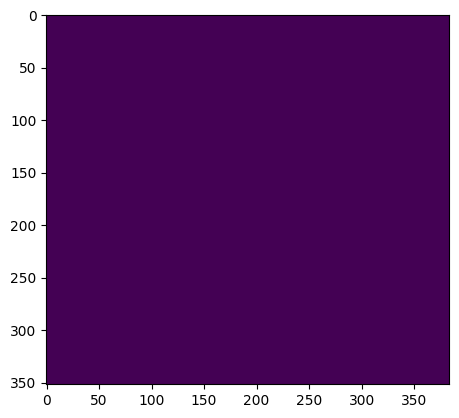

In [59]:
plt.imshow(np.subtract(out3.squeeze().numpy(), np.pad(output.squeeze().numpy(), ((1,1),(2,2)), 'constant', constant_values=0)))

In [60]:
np.all(np.subtract(out3.squeeze().numpy(), np.pad(output.squeeze().numpy(), ((1,1),(2,2)), 'constant', constant_values=0)) == 0)

True

In [61]:
for (i,j), value in np.ndenumerate(np.subtract(out3.squeeze().numpy(), np.pad(output.squeeze().numpy(), ((1,1),(2,2)), 'constant', constant_values=0))):
    if value != 0:
        print(i,j,value)